## PREGUNTA 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def knearestneighbors(query, data, n_neighbors=5):
    # S'assumeix que data es una matriu que conte
    # tota la base de dades de entrenament amb les seguents dimensions
    # nombre d instancies x nombre de caracteristiques
    euclidean_distance = np.sqrt(np.sum(np.power(data-query,2),axis=1))
    sorted_array = np.argsort(euclidean_distance)
    return sorted_array[:n_neighbors]

In [2]:
def kmeans(data, n_clusters=15, n_iterations=100):
    n_instances, n_features = data.shape
    
    #initialitzacio dels clusters
    idx_clusters = np.random.permutation(n_instances)[:n_clusters]
    clusters = data[idx_clusters,:]
    
    for i_iter in range(n_iterations):
        idx2cluster = np.zeros((n_instances,))
        for i_instances in range(n_instances):
            idx2cluster[i_instances] = knearestneighbors(data[i_instances,:], clusters, n_neighbors=1)
            
        for i_clusters in range(n_clusters):
            clusters[i_clusters,:] = np.mean(data[idx2cluster==i_clusters,:],axis=0)
            
    return clusters
            
            

In [3]:
X = np.random.randn(200,2)
clusters = kmeans(X)

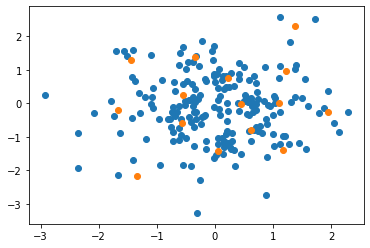

In [4]:
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(clusters[:,0],clusters[:,1])
plt.show()

## PREGUNTA 4

In [5]:
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons
from sklearn.neural_network import MLPClassifier
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

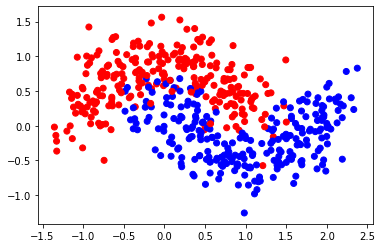

In [6]:
X, y = make_moons(noise=0.25, random_state=0, n_samples = 500)
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# just plot the dataset first
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
plt.show()

In [7]:
# Prepare data for training and testing
n_instances, n_features = X.shape
idx = np.random.permutation(n_instances)
percentage_training=0.8
n_training_samples = int(percentage_training * n_instances)
train_index = idx[:n_training_samples]
test_index = idx[n_training_samples:]

In [8]:
# Separation of the data for training and testing
X_train = X[train_index]
X_test  = X[test_index]
y_train = y[train_index]
y_test  = y[test_index]

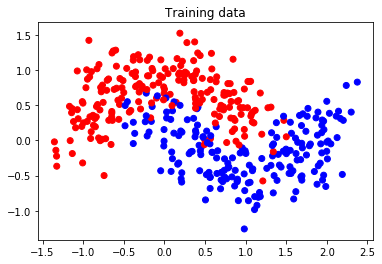

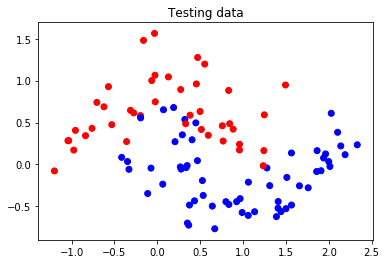

In [9]:
# Visualization of the training and testing points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
plt.title('Training data')
plt.show()
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright)
plt.title('Testing data')
plt.show()

In [10]:
# Training of the knn, decision tree and neural network classifier
clf_knn = neighbors.KNeighborsClassifier(n_neighbors=15)
clf_knn.fit(X_train, y_train)

clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)
clf_NN = MLPClassifier(solver='lbfgs', alpha=1e-5, random_state=1,
                                     hidden_layer_sizes=[100, 100])
clf_NN.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[100, 100], learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [11]:
def visualize_classifier(clf, xx, yy,title=''):
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.show()

    

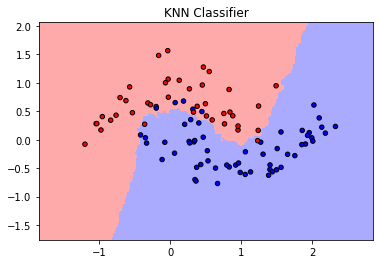

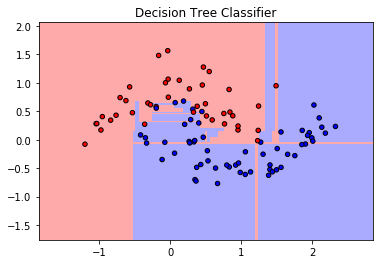

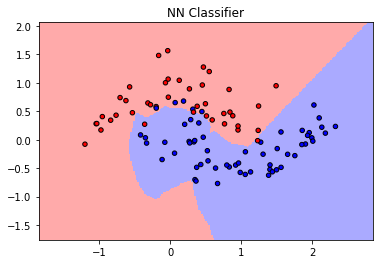

In [12]:
# Visualization of the testing points and classification regions
visualize_classifier(clf_knn,xx,yy,'KNN Classifier')
visualize_classifier(clf_tree,xx,yy,'Decision Tree Classifier')
visualize_classifier(clf_NN,xx,yy,'NN Classifier')

In [13]:
# Simple accuracy evaluation of the algorithm
y_pred = clf_knn.predict(X_test)
score=accuracy_score(y_test, y_pred)
print("KNN Accuracy:"+str(score))
y_pred = clf_tree.predict(X_test)
score=accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:"+str(score))
y_pred = clf_NN.predict(X_test)
score=accuracy_score(y_test, y_pred)
print("NN Accuracy:"+str(score))

KNN Accuracy:0.93
Decision Tree Accuracy:0.91
NN Accuracy:0.92


In [14]:
# K-fold Crossvalidation
from sklearn.model_selection import KFold
K=10
kf = KFold(n_splits=K) # Define the split - into 2 folds 
# important point to generate the splits
kf.get_n_splits(X)
knn_score = np.zeros((K,))
tree_score = np.zeros((K,))
NN_score = np.zeros((K,))
for i_iter, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf_knn.fit(X_train, y_train)
    clf_tree.fit(X_train, y_train)
    clf_NN.fit(X_train, y_train)
    y_pred = clf_knn.predict(X_test)
    print("Fold "+str(i_iter))
    score=accuracy_score(y_test, y_pred)
    knn_score[i_iter]=score
    print("KNN Accuracy:"+str(score))
    y_pred = clf_tree.predict(X_test)
    score=accuracy_score(y_test, y_pred)
    tree_score[i_iter]=score
    print("Decision Tree Accuracy:"+str(score))
    y_pred = clf_NN.predict(X_test)
    score=accuracy_score(y_test, y_pred)
    NN_score[i_iter]=score
    print("NN Accuracy:"+str(score))
print('KNN classifiers accuracy: '+str(np.mean(knn_score))+' +/- '+str(np.std(knn_score)))
print('Tree classifier accuracy '+str(np.mean(tree_score))+' +/- '+str(np.std(tree_score)))
print('NN classifier accuracy: '+str(np.mean(NN_score))+' +/- '+str(np.std(NN_score)))


Fold 0
KNN Accuracy:0.92
Decision Tree Accuracy:0.92
NN Accuracy:0.9
Fold 1
KNN Accuracy:0.94
Decision Tree Accuracy:0.96
NN Accuracy:0.92
Fold 2
KNN Accuracy:0.92
Decision Tree Accuracy:0.92
NN Accuracy:0.9
Fold 3
KNN Accuracy:0.92
Decision Tree Accuracy:0.86
NN Accuracy:0.9
Fold 4
KNN Accuracy:0.9
Decision Tree Accuracy:0.86
NN Accuracy:0.9
Fold 5
KNN Accuracy:0.98
Decision Tree Accuracy:0.96
NN Accuracy:0.98
Fold 6
KNN Accuracy:0.94
Decision Tree Accuracy:0.84
NN Accuracy:0.94
Fold 7
KNN Accuracy:0.98
Decision Tree Accuracy:0.94
NN Accuracy:0.96
Fold 8
KNN Accuracy:0.96
Decision Tree Accuracy:0.94
NN Accuracy:0.94
Fold 9
KNN Accuracy:0.92
Decision Tree Accuracy:0.88
NN Accuracy:0.88
KNN classifiers accuracy: 0.9380000000000001 +/- 0.025999999999999975
Tree classifier accuracy 0.908 +/- 0.04214261501141094
NN classifier accuracy: 0.922 +/- 0.03026549190084309
